In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt



In [2]:
#drop
rawdataAll = pd.read_excel('data/hour30days.xlsx')
#rawdataAll.head()
preProcDataAll = rawdataAll.dropna(axis='rows', how='any')

print("before:" + str(rawdataAll.shape))
print("after:" + str(preProcDataAll.shape))
feature_names = preProcDataAll.columns
df = preProcDataAll[feature_names]
raw_feature = df[:-1]
raw_target = df['松山區松山細懸浮微粒 PM 2.5  (μg/m 3 )'][1:]
#print(raw_target.shape)
#print(raw_feature.shape)

X_train, X_test,Y_train, Y_test = train_test_split(
    raw_feature, raw_target, test_size=0.25, random_state=5)
print("X_train:"+str(X_train.shape))
print("X_test:"+str(X_test.shape))
print("Y_train:"+str(Y_train.shape))
print("Y_test:"+str(Y_test.shape))



feature = X_train
target = Y_train

#target.head()
#feature.head()
lm = LinearRegression(normalize=True)

X = feature
Y = target
lm.fit(X,Y)

print('lm1 coef is:',lm.coef_)
print('lm1 intercept is:',lm.intercept_)
pd.DataFrame( list(zip(X.columns, lm.coef_)) , columns = ['feature','estimatedCoefficients'])
mse = np.mean( (Y_test - lm.predict(X_test))**2 )
print('mse is '+str(mse))
print('final score: '+str(lm.score(X,Y)))



before:(742, 25)
after:(489, 25)
X_train:(366, 25)
X_test:(122, 25)
Y_train:(366,)
Y_test:(122,)
lm1 coef is: [ 4.25140554e-01  6.31225525e-03 -8.18043724e-03  6.55338507e-02
 -5.72867224e-02  1.97381992e-03  1.10463450e-03  1.08967010e-01
 -1.76550015e-01  2.47959166e-03  9.71417987e-01  2.60340011e-02
  3.11941658e-03  4.73423591e-03 -8.86350297e-01  1.32702697e-01
 -1.50628282e-01  1.37799813e-03  1.76028637e-03  4.57837364e-01
 -6.16736051e-01  1.12803948e-03  3.35095375e-04  9.26397420e-02
  4.46372107e-02]
lm1 intercept is: -0.17020979616347276
mse is 21.34724399528972
final score: 0.8521525638301419


In [3]:
# fill 0
preProcDataAll_fill0 = rawdataAll.fillna(0)
print("before:" + str(rawdataAll.shape))
print("after:" + str(preProcDataAll_fill0.shape))

feature_names = preProcDataAll_fill0.columns
df2 = preProcDataAll_fill0[feature_names]
raw_feature2 = df2[:-1]
raw_target2 = df2['松山區松山細懸浮微粒 PM 2.5  (μg/m 3 )'][1:]

X2_train, X2_test,Y2_train, Y2_test = train_test_split(
    raw_feature2, raw_target2, test_size=0.25, random_state=5)

print("X_train:"+str(X2_train.shape))
print("X_test:"+str(X2_test.shape))
print("Y_train:"+str(Y2_train.shape))
print("Y_test:"+str(Y2_test.shape))

feature2 = X2_train
target2 = Y2_train



lm2 = LinearRegression(normalize=True)
X2 = feature2
Y2 = target2
lm2.fit(X2,Y2)
print('intercept is:',lm.intercept_)
pd.DataFrame( list(zip(X2.columns, lm2.coef_)) , columns = ['feature','estimatedCoefficients'])
mse2 = np.mean( (Y2_test - lm2.predict(X2_test))**2 )
print('lm2 mse is:'+str(mse2))
print('final score: '+str(lm2.score(X,Y)))

before:(742, 25)
after:(742, 25)
X_train:(555, 25)
X_test:(186, 25)
Y_train:(555,)
Y_test:(186,)
intercept is: -0.17020979616347276
lm2 mse is:22.762265960179803
final score: 0.8343891595301158


In [4]:
#with normalize & standardlize
# fill 0
preProcDataAll_fill0 = rawdataAll.fillna(0)
print("before:" + str(rawdataAll.shape))
print("after:" + str(preProcDataAll_fill0.shape))

feature_names = preProcDataAll_fill0.columns
df2 = preProcDataAll_fill0[feature_names]
raw_feature2 = df2[:-1]
raw_target2 = df2['松山區松山細懸浮微粒 PM 2.5  (μg/m 3 )'][1:]

X2_train, X2_test,Y2_train, Y2_test = train_test_split(
    raw_feature2, raw_target2, test_size=0.25, random_state=5)

print("X_train:"+str(X2_train.shape))
print("X_test:"+str(X2_test.shape))
print("Y_train:"+str(Y2_train.shape))
print("Y_test:"+str(Y2_test.shape))

feature2 = X2_train
target2 = Y2_train

#Standardlisze
scaler = StandardScaler()
scaler.fit(feature2)
sfeature =  scaler.transform(feature2)
print(sfeature.shape)

lm2 = LinearRegression(normalize=True)
X2 = feature2
Y2 = target2
lm2.fit(X2,Y2)
print('intercept is:',lm.intercept_)
pd.DataFrame( list(zip(X2.columns, lm2.coef_)) , columns = ['feature','estimatedCoefficients'])
mse2 = np.mean( (Y2_test - lm2.predict(X2_test))**2 )
print('lm2 mse is:'+str(mse2))
print('final score: '+str(lm2.score(X,Y)))


before:(742, 25)
after:(742, 25)
X_train:(555, 25)
X_test:(186, 25)
Y_train:(555,)
Y_test:(186,)
(555, 25)
intercept is: -0.17020979616347276
lm2 mse is:22.762265960179803
final score: 0.8343891595301158


In [11]:
#notification
import requests
import random

rand = random.randrange(0, len(X_test), 1)
print('index:'+str(rand))
predictData = X_test.iloc[rand:rand+1] 
#print(predictData)
answer = lm.predict(predictData)
answer = int(answer) 
print('predict is:'+str(answer))

message=''
if 0<=answer and answer<50: message = '空氣品質良好喔~'
elif 51<=answer and answer<100: message = '空氣品質普通，極敏感族群請留意可能產生的咳嗽及呼吸急促症狀~'
elif 101<=answer and answer<150: message = '空氣品質對敏感族群不健康，應減少戶外活動、孩童及老年人建議戴口罩~'
elif 151<=answer and answer<200: message = '空氣品質對所有人不健康，盡量少出門、戶外活動應增加休息時間~'
elif 201<=answer and answer<300: message = '空氣品質非常不健康，有氣喘的人應增加使用吸入劑頻率~'
elif 301<=answer and answer<500: message = '空氣品質已達危害等級，請沒事盡量不要出門~'
else: message = 'out of range'
answer = str(answer)

path='https://maker.ifttt.com/trigger/noticePM25/with/key/{your_key}'
body={
    'value1':' 松山區 ',
    'value2':answer,
    'value3':message
}
r = requests.post(path, data = body)
print(r.text)

index:16
predict is:2
Congratulations! You've fired the noticePM25 event


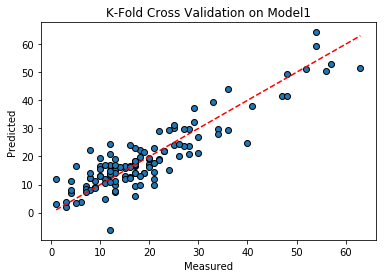

In [6]:
predicted = cross_val_predict(lm, X_test, Y_test, cv=10)
fig, ax = plt.subplots()
ax.scatter(Y_test, predicted, edgecolors=(0, 0, 0))

ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')

plt.title('K-Fold Cross Validation on Model1')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



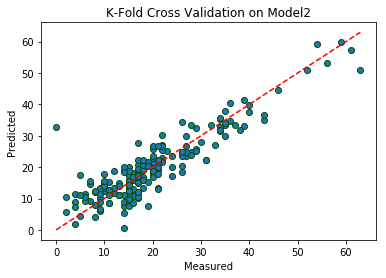

In [7]:
predicted2 = cross_val_predict(lm2, X2_test, Y2_test, cv=10)
fig, ax = plt.subplots()
ax.scatter(Y2_test, predicted2, edgecolors=(0, .3, 0))

ax.plot([Y2_test.min(), Y2_test.max()], [Y2_test.min(), Y2_test.max()], 'r--')

plt.title('K-Fold Cross Validation on Model2')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [9]:
#lm1 score
loss = cross_val_score(lm, X, Y, cv=10, scoring='neg_mean_squared_error')

print(loss)
print('mean mse:'+str(loss.mean()))

scores = cross_val_score(lm, X_train, Y_train, cv=10, scoring='r2')

print(scores)
print('mean r2:'+str(scores.mean()))

[-26.71379162 -12.4015139  -25.3515253  -16.95141041 -24.96383944
 -26.49745983 -22.75309958 -21.60589266 -13.94001151 -24.24012578]
mean mse:-21.54186700327143
[0.85271729 0.87944734 0.83117563 0.83656947 0.4958474  0.78801908
 0.79915394 0.79306628 0.88326503 0.85163242]
mean r2:0.8010893886287447


In [10]:
#lm2 score
loss2 = cross_val_score(lm2, X2_train, Y2_train, cv=10, scoring='neg_mean_squared_error')

print(loss2)
print('mean loss:'+str(loss2.mean()))

scores2 = cross_val_score(lm2, X2, Y2, cv=10, scoring='r2')

print(scores2)
print('mean score:'+str(scores2.mean()))

[-19.90431352 -31.85432236 -19.29704058 -22.12155725 -18.02283207
 -25.26631013 -25.47245394 -22.7819572  -18.13430009 -18.74802375]
mean loss:-22.16031108830291
[0.82163238 0.8151866  0.91533627 0.77052979 0.86005427 0.78947641
 0.78665755 0.80214003 0.82490262 0.85717761]
mean score:0.824309352865322


In [124]:

scores2 = cross_val_score(lm, X, Y, cv=10, scoring='r2')

print(scores2)
print('mean score:'+str(scores.mean()))

[0.85271729 0.87944734 0.83117563 0.83656947 0.4958474  0.78801908
 0.79915394 0.79306628 0.88326503 0.85163242]
mean score:0.8010893886287447
